### Etiquetas para revisar y ordenar luego el contenido:
* #Unit_test
* #Hipothesis
* #To_check
* #Prio
* #Nice_to_have
* #Data_quality_check

#Prio
### Primer exploratorio del dataset, se va a comprobar:
* calidad del mismo (missing vals? cantidad de histórico? ...)
* representación gráfica de las series temporales para algunos clientes
* análsis estadístico descriptivo inicial

In [114]:
class ExploreDataset():
    def __init__(self):
        self.dataset_ = None

    def read_dataset_from_csv(self, path, sep=',', number_of_rows=None):
        """Lee los datos y los almacena en un dataframe; otra versión de este método incluiría posibilidad de extraer otro orden de magnitud de datos con PySpark, Dask o Vaex

           Args:
               path ([string]): ruta de acceso al archivo 
               sep ([string]): separador de valores en el csv
               number_of_rows ([int]): número deseado de registros en caso de querer limitar la extracción
           Returns:
               Pandas dataframe    
        """
        try:
            import pandas as pd 
            
            if number_of_rows is not None: 
                retrieved_df = pd.read_csv(filepath_or_buffer=path, sep=sep, nrows=number_of_rows)
            else:
                retrieved_df = pd.read_csv(filepath_or_buffer=path, sep=sep)

            self.dataset_=retrieved_df

            return retrieved_df
        except Exception as exc:
            #log error with logger
            print(exc)
            return exc

    def generate_date(self, year=None, month=None, day=28):
        """Crea un valor de fecha tipo datetime

           Args:
               year ([int]): año 
               month ([int]): mes
               day ([int]): día
           Returns:
               Fecha de tipo datetime    
        """
        try:
            from datetime import datetime

            return datetime(year, month, day)
            
        except Exception as exc:
            #log error with logger
            print(exc)
            return exc

    def add_date_attribute(self, year_column_name, month_column_name=None, day_column_name=28):
        try:
            """Crea nuevo atribute date para visualizar la serie entre otras posibles utilidades
            
               Args:
                   year_column_name ([string]): nombre del atributo año
                   month_column_name ([string]): nombre del atributo mes 
                   day_column_name ([string]): nombre del atributo día
                    
               Returns:
               
            """
            self.dataset_['date'] = pd.Series(self.dataset_.index).apply(lambda idx: self.generate_date(self.dataset_.iloc[idx][year_column_name], 
                                        self.dataset_.iloc[idx][month_column_name])) 

        except Exception as exc:
            #log error with logger
            print(exc)
            return exc


    def plot_timeseries_values(self, attribute_to_plot, mask_attribute_name=None, mask_attribute_value=None, date_column_name=None, graph_title=None):
        """Representa la serie temporal de los valores correspondientes a: 
           - atributo indicado del dataframe, o
           - valores del atributo indicado para los registros que cumplan el filtro indicado
            
           Args:
               attribute_to_plot ([string]): nombre del atributo a representar 
               attribute_name ([string]): nombre de la columna a representar 
               attribute_mask_value ([]): valor condición para extraer los registros deseados
               date_column_name ([string]): nombre de la columna con los valores de fecha
               graph_title ([string]): nombre de la gráfica a representar
           Returns:
               
        """
        try:
            import plotly.express as px

            dataset = self.dataset_
            if (mask_attribute_name is not None)&(mask_attribute_value is not None):
                client_mask = self.dataset_[mask_attribute_name]==mask_attribute_value
                dataset=dataset[client_mask]

            sorted_dataset = dataset.sort_values(by=date_column_name, ascending=True)
            
            fig = px.line(sorted_dataset, x=date_column_name, y=attribute_name, title=graph_title)
            fig.show()

        except Exception as exc:
            #log error with logger
            print(exc)
            return exc
            
    

#Nice_to_have --> Se intentará almacenar la info en un objeto que instancia la clase ExploreDataset 

In [115]:
file_path = r'.\data\movementsSample.csv'

explorer_obj = ExploreDataset()
explorer_obj.read_dataset_from_csv(file_path)

,associatedAccountId,categoryId,categoryDescription,year,month,monthlySpent
0,38892626,21,PRODUCTOS Y SERVICIOS DIGITALES,2017,1,19.95
1,45498029,4,MODA,2017,1,99.15
2,42811125,13,SUPERMERCADOS Y ALIMENTACIÓN,2017,1,118.50
3,49267925,4,MODA,2017,1,54.85
4,23897424,2,AUTOPISTAS GASOLINERAS Y PARKINGS,2017,2,45.00
...,...,...,...,...,...,...
147353,30977524,1003,TRANSFERENCIAS DE ENTRADA,2018,5,60.00
147354,43396928,1006,NÓMINAS,2019,9,1890.55
147355,54608229,34,TRANSFERENCIAS DE SALIDA,2017,7,30.00
147356,29292026,1006,NÓMINAS,2017,7,1435.21


In [116]:
print('categorías de movimientos: {}'.format(explorer_obj.dataset_.categoryDescription.unique()))

categorías de movimientos: ['PRODUCTOS Y SERVICIOS DIGITALES' 'MODA' 'SUPERMERCADOS Y ALIMENTACIÓN'
 'AUTOPISTAS GASOLINERAS Y PARKINGS' 'RESTAURACIÓN' 'OCIO'
 'TRANSPORTE (NO AÉREO)' 'OPERACIONES CAJERO' 'EFECTIVO'
 'VIAJES HOTELES Y LÍNEAS AÉREAS'
 'TELECOMUNICACIONES TELEVISIÓN E INTERNET' 'SALUD Y BELLEZA'
 'GRANDES ALMACENES' 'EDUCACIÓN' 'DEPORTES Y JUGUETES' 'SIN CLASIFICAR'
 'OTROS GASTOS' 'COMPRA ONLINE' 'MENAJE DEL HOGAR Y ELECTRÓNICA'
 'ALQUILER DE VEHÍCULOS' 'VEHíCULOS Y REPARACIONES' 'JOYERÍA'
 'MUEBLES Y DECORACIÓN' 'BRICOLAJE Y JARDINERDÍA' 'JUEGOS Y APUESTAS'
 'TASAS E IMPUESTOS' 'COMUNIDADES DE PROPIETARIOS'
 'CUOTAS Y ENTIDADES FINANCIERAS' 'SOCIEDADES BENÉFICAS' 'SEGUROS'
 'GAS Y ELECTRICIDAD' 'AGUA' 'TRANSFERENCIAS DE ENTRADA' 'REEMBOLSO EVO'
 'TRANSFERENCIAS DE SALIDA' 'NÓMINAS' 'ALQUILER' 'SEGURIDAD SOCIAL'
 'COLEGIOS PROFESIONALES' 'SINDICATOS TRABAJADORES'
 'REVISTAS LIBROS Y PRENSA' 'SISTEMAS DE SEGURIDAD'
 'ASESORES GESTORÍAS Y ABOGADOS' 'OPERACIONES EN OFICINA

#Hipótesis --> habrá unas categorías cuya distribución temporal sea mucho más constante que otras, por ejemplo: se espera que la categoría 'MENAJE DEL HOGAR Y ELECTRÓNICA' no presente un claro patrón de consumo como sí lo deberíamos ver en 'GAS Y ELECTRICIDAD' <p>
#Prio --> calcular el techo de gasto mediano (y su std) para cada cliente; en base a este valor, podremos ajustar las estimaciones de consumo de un usuario a final de mes al menos para los que presenten un gasto uniforme (esto podría ser otro criterio de segmentación de tipo de clientes)


#Data_quality_check --> tenemos el mismo número de IDs de categorías que de descripciones?

In [117]:
assert len(explorer_obj.dataset_['categoryDescription'].unique())==len(explorer_obj.dataset_['categoryId'].unique())


AssertionError: 

In [118]:
print('número de valores distintos de categoryDescription : {} y número de valores distintos de categoryId : {}'.format(len(explorer_obj.dataset_['categoryDescription'].unique()), len(explorer_obj.dataset_['categoryId'].unique()))) 


número de valores distintos de categoryDescription : 45 y número de valores distintos de categoryId : 46


### Comprobamos qué categoryId nos sobra; para ello, vemos las combinaciones de description e ID:

In [119]:
category_desc__ID_combinations = explorer_obj.dataset_[['categoryId', 'categoryDescription']].drop_duplicates()
#category_desc__ID_combinations.categoryId.value_counts()
category_desc__ID_combinations.categoryDescription.value_counts()

SIN CLASIFICAR                              2
SEGURIDAD SOCIAL                            1
SUPERMERCADOS Y ALIMENTACIÓN                1
SEGUROS                                     1
AGUA                                        1
OCIO                                        1
ALQUILER                                    1
OTROS GASTOS                                1
PRODUCTOS Y SERVICIOS DIGITALES             1
SINDICATOS TRABAJADORES                     1
RESTAURACIÓN                                1
TASAS E IMPUESTOS                           1
TRANSPORTE (NO AÉREO)                       1
MODA                                        1
GESTIÓN INMOBILIARIA                        1
BRICOLAJE Y JARDINERDÍA                     1
MENAJE DEL HOGAR Y ELECTRÓNICA              1
TELECOMUNICACIONES TELEVISIÓN E INTERNET    1
NÓMINAS                                     1
COMUNIDADES DE PROPIETARIOS                 1
JUEGOS Y APUESTAS                           1
CUOTAS Y ENTIDADES FINANCIERAS    

#### Vemos que la descripción duplicada corresponde a 'SIN CLASIFICAR', por lo que no se trata de una duplicidad a corregir
#### Podría ser interesante mirar la cuantía de movimientos no clasificados, en caso de que sea alta y de posible interés a identificar 

In [120]:
# añadimos este dataset de combinaciones a nuestro objeto exploratorio:
explorer_obj.category_desc__ID_combinations = category_desc__ID_combinations

if explorer_obj.category_desc__ID_combinations.to_dict==category_desc__ID_combinations.to_dict:
    category_desc__ID_combinations=None


### Representamos los valores de alguna serie temporal

In [121]:
#Unit_test 
from datetime import datetime

assert datetime(2017, 1, 1, 0, 0)==explorer_obj.generate_date(2017, 1, 1) 

In [122]:
'''
import pandas as pd 
import time

init_time = time.time()
explorer_obj.dataset_['date'] = pd.Series(explorer_obj.dataset_.index).apply(lambda idx: explorer_obj.generate_date(explorer_obj.dataset_.iloc[idx]['year'], explorer_obj.dataset_.iloc[idx]['month'])) 
#Nice_to_have --> EFICIENTAR

print('process time: {}'.format((time.time() - init_time)))
'''

"\nimport pandas as pd \nimport time\n\ninit_time = time.time()\nexplorer_obj.dataset_['date'] = pd.Series(explorer_obj.dataset_.index).apply(lambda idx: explorer_obj.generate_date(explorer_obj.dataset_.iloc[idx]['year'], explorer_obj.dataset_.iloc[idx]['month'])) \n#Nice_to_have --> EFICIENTAR\n\nprint('process time: {}'.format((time.time() - init_time)))\n"

In [123]:
explorer_obj.dataset_['date'] = explorer_obj.add_date_attribute(year_column_name='year', month_column_name='month')


In [124]:
explorer_obj.dataset_

,associatedAccountId,categoryId,categoryDescription,year,month,monthlySpent,date
0,38892626,21,PRODUCTOS Y SERVICIOS DIGITALES,2017,1,19.95,None
1,45498029,4,MODA,2017,1,99.15,None
2,42811125,13,SUPERMERCADOS Y ALIMENTACIÓN,2017,1,118.50,None
3,49267925,4,MODA,2017,1,54.85,None
4,23897424,2,AUTOPISTAS GASOLINERAS Y PARKINGS,2017,2,45.00,None
...,...,...,...,...,...,...,...
147353,30977524,1003,TRANSFERENCIAS DE ENTRADA,2018,5,60.00,None
147354,43396928,1006,NÓMINAS,2019,9,1890.55,None
147355,54608229,34,TRANSFERENCIAS DE SALIDA,2017,7,30.00,None
147356,29292026,1006,NÓMINAS,2017,7,1435.21,None


In [93]:
nominas_mask = explorer_obj.dataset_['categoryDescription']=='NÓMINAS'
dataset_nominas = explorer_obj.dataset_[nominas_mask]
assert len(dataset_nominas)>0
print('número de registros con tipo de movimiento ''NOMINA'': {}'.format(len(dataset_nominas)))

número de registros con tipo de movimiento NOMINA: 6877


### Contamos el porcentaje de clientes que tienen algún movimiento para cada categoría: 

In [70]:
'''
print('número de clientes: {}'.format(len(explorer_obj.dataset_.associatedAccountId.unique())))
print('número de clientes con nómina: {}'.format(len(dataset_nominas.associatedAccountId.unique())))
'''

categories = explorer_obj.dataset_['categoryDescription']


número de clientes: 753
número de clientes con nómina: 347


### Y ahora calculamos dicho "ratio de uso" normalizado con el importe de los correspondientes movimientos; esto nos podría dar una idea de la relevancia de unas categorías de movimientos sobre otras, ya que no es lo mismo 3 movimientos de la categoría 'GAS Y ELECTRICIDAD' que 3 de la categoría 'VIAJES HOTELES Y LÍNEAS AÉREAS', esto nos podría ayudar a dar pesos específicos de importancia por cada categoría de movimiento...

### Comprobamos si número_registros/número_clientes = (número_meses_3_años)*número_categorías, o sea 36

In [127]:
len(explorer_obj.dataset_)/len(explorer_obj.dataset_.associatedAccountId.unique())


195.6945551128818

represento la serie temporal de un cliente para un producto:

In [100]:
'''
import plotly.express as px

client_mask = dataset_nominas['associatedAccountId']==43396928
sorted_client_nominas = dataset_nominas[client_mask].sort_values(by='date', ascending=True)
fig = px.line(sorted_client_nominas, x="date", y="monthlySpent", title='Nóminas cliente 43396928')
fig.show()
'''
client_ID=43396928
explorer_obj.plot_timeseries_values(attribute_to_plot="monthlySpent", mask_attribute_name='associatedAccountId', mask_attribute_value=client_ID, date_column_name='date', graph_title='Nóminas cliente {}'.format(client_ID))


import plotly.express as px

client_mask = dataset_nominas['associatedAccountId']==43396928
sorted_client_nominas = dataset_nominas[client_mask].sort_values(by='date', ascending=True)
fig = px.line(sorted_client_nominas, x="date", y="monthlySpent", title='Nóminas cliente 43396928')
fig.show()

### Esos picos podrían indicar pagas extras... Pruebo otro cliente

In [14]:
client_mask = dataset_nominas['associatedAccountId']==29292026
sorted_client_nominas = dataset_nominas[client_mask].sort_values(by='date', ascending=True)
fig = px.line(sorted_client_nominas, x="date", y="monthlySpent", title='Nóminas cliente 43396928')
fig.show()

### anomalía gordísima (generar atributo de anomalías univariables para cada registro de cada cliente en cada producto?)

In [15]:
client_ID=dataset_nominas.iloc[10]['associatedAccountId']
client_mask = dataset_nominas['associatedAccountId']==client_ID
sorted_client_nominas = dataset_nominas[client_mask].sort_values(by='date', ascending=True)
fig = px.line(sorted_client_nominas, x="date", y="monthlySpent", title='Nóminas cliente {}'.format(client_ID))
fig.show()

### Podría segmentar clientes por tipo de ingresos? Los que presenten patrones más repetitivos con picos en torno a junio y diciembre podrían ser asalariados, mientras que otros como éste podrían ser autónomos etc?

#### Pensar en categorizar tipos de productos por relevancia: podría ser por cuantía mediana de movimientos de esa categoría, o por número agregado entre todos los clientes

In [16]:
category = 'AUTOPISTAS GASOLINERAS Y PARKINGS' 
#represento la serie temporal de un cliente para un producto:
category_mask = explorer_obj.dataset_['categoryDescription']==category
dataset_category = explorer_obj.dataset_[category_mask]
assert len(dataset_category)>0
print(len(dataset_category))


6813


#### como era de esperar, más clientes tienen este tipo de movimiento que nómina domiciliada (makes sense, business testing)

In [17]:
import plotly.express as px 

client_ID=dataset_category.iloc[10]['associatedAccountId']
client_mask = dataset_category['associatedAccountId']==client_ID
sorted_client_category = dataset_category[client_mask].sort_values(by='date', ascending=True)
fig = px.line(sorted_client_category, x="date", y="monthlySpent", title='{} cliente {}'.format(category, client_ID))
fig.show()

In [18]:
fig = px.scatter(sorted_client_category, x="date", y="monthlySpent", title='{} cliente {}'.format(category, client_ID))
fig.show()

#### esto parece indicar estacionalidad correspondiente a vacaciones (en torno a julio-agosto de cada año) --> probar DT-regressor, ARIMA, CNN, LSTM, etc

#### en estas regresiones temporales multivariables podríamos añadir como atributos la ocurrencia o no de movimientos anómalos de otras categorías relacionadas

In [19]:
category = 'VEHíCULOS Y REPARACIONES'
#represento la serie temporal de un cliente para un producto:
category_mask = explorer_obj.dataset_['categoryDescription']==category
dataset_category = explorer_obj.dataset_[category_mask]
assert len(dataset_category)>0
print(len(dataset_category))

973


In [20]:
client_ID=dataset_category.iloc[10]['associatedAccountId']
client_mask = dataset_category['associatedAccountId']==client_ID
sorted_client_category = dataset_category[client_mask].sort_values(by='date', ascending=True)
fig = px.scatter(sorted_client_category, x="date", y="monthlySpent", title='{} cliente {}'.format(category, client_ID))
fig.show()

#### CATEGORIZAR LAS SUBCATEGORIAS EN CATEGORÍAS SUPERIORES; ASÍ AUMENTAMOS ADEMÁS LOS DATOS DE MOVIMIENTOS PARA CATEGORÍAS COMO LA ANTERIOR QUE TIENEN POCOS MOVIMIENTOS

#### FUTURIBLE: INTENTAR PENSAR TB EN APLICAR NLP A LOS TEXTOS DEL CAMPO CONCEPTO. PODRÍA INFORMAR DE POSIBLES GASTOS ASOCIADOS DE OTRO TIPO? POR EJEMPLO SI SE VE UN MOVIMIENTO QUE INDIQUE "GUARDERÍA" QUIZÁS SE LE PUEDE RECOMENDAR PRODUCTOS RELACIONADOS CON BEBÉS. Esto más bien sería para categorizar los movimientos no clasificados con categoría alguna

#### HAY CATEGORÍAS QUE PODRÍAN PERTENECER A MÁS DE UNA SUPERCATEGORÍA; POR EJEMPLO, GASTOS DE VIAJES PUEDE SER TANTO PARA TEMAS DE OCIO COMO TEMAS DE TRABAJO, PENSAR EN ESTO Y VALIDAR SI ES POSIBLE CON CORRELACIONES EN EL EDA  

In [21]:
explorer_obj.dataset_[['associatedAccountId', 'categoryId', 'year', 'month', 'monthlySpent']]

,associatedAccountId,categoryId,year,month,monthlySpent
0,38892626,21,2017,1,19.95
1,45498029,4,2017,1,99.15
2,42811125,13,2017,1,118.50
3,49267925,4,2017,1,54.85
4,23897424,2,2017,2,45.00
...,...,...,...,...,...
147353,30977524,1003,2018,5,60.00
147354,43396928,1006,2019,9,1890.55
147355,54608229,34,2017,7,30.00
147356,29292026,1006,2017,7,1435.21


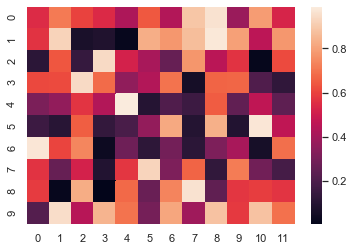

In [22]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

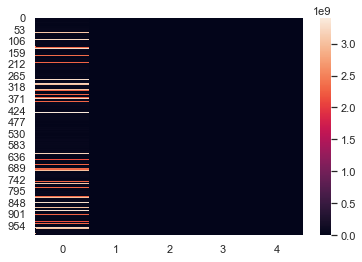

In [27]:
import seaborn as sns #; sns.set()

ax = sns.heatmap(explorer_obj.dataset_[['associatedAccountId', 'categoryId', 'year', 'month', 'monthlySpent']].iloc[:1000].values)


#### PROBAR A REALIZAR LA MISMA PRUEBA SOBRE UN DATASET SENCILLO A MODO UNIT TEST

### PERFILAR ADEMÁS DE TIPOS DE GASTO, LOS TIPOS DE CLIENTE SEGÚN: 
* ESTACIONALIDAD EN SU CONSUMO
* NÚMERO DE MOVIMIENTOS REGISTRADOS EN CIERTO TIPO DE CONSUMO
* REGULARIDAD EN LA FORMA DE CONSUMIR DICHA CATEGORÍA
* ... 

# MODELO QUE SE ME OCURRE DE FORECASTING: MULTIVARIATE DATASET POR CDA CLIENTE (O TIPO DE CLIENTES SI HAGO SEGMENTACIÓN):
* Por cada cliente, tengo para cada producto un valor de consumo en cada registro temporal, por lo que la entrada sería multivariable con objetivo de predecir el consumo en el producto requerido
* Puedo intentar que las entrada multivariable no sea con cada tipo, sino con super tipos de productos
* En caso de hacer segmentación de clientes, en lugar de un modelo por cliente, podría ser un modelo por tipo de cliente, donde este perfilado de cliente sería en base a: 
- cómo de constante es en sus consumos: su patrón de consumo definido con la std de de las std de franjas temporalaes (divide el histórico en cuatrimestres por ej) 
- qué estacionalidad tiene en ciertas categorías: por ej., en combustible tiene semestral coincidiendo con vacas? 
